In [5]:
#bagging decision trees for classfication
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler


**Read Data**

In [6]:
df_raw=pd.read_csv("./Data_Processed_All_Contractors_Characteristics - Data.csv")
df_raw.head(10)
df_raw.shape

(5046, 77)

**Prepare the data**

In [7]:
df_2016 = df_raw.loc[df_raw['year'] == 2016]
df_2016_xy = df_2016.iloc[:,:57].drop(['Dealer ID','No. of Employees','year','JS 17.Column3','JS 18.Column3','JS 19.Column3','NON USER 17.Column3','NON USER 18.Column3','Velocity 17.Column3','centurty 18.Column3','Gibson 18.Column3'],axis=1)

In [8]:
column_list=list(df_raw.columns)
# print(column_list)

In [9]:
def find_index(name):
    index_num = column_list.index(name)
    print(index_num)

In [10]:
find_index('applied 2016')

56


In [11]:
df_2016.columns

Index(['Dealer ID', 'year', 'train_test', 'Converted State-AL',
       'Converted State-AR', 'Converted State-CA', 'Converted State-FL',
       'Converted State-GA', 'Converted State-IL', 'Converted State-IN',
       'Converted State-KY', 'Converted State-LA', 'Converted State-MI',
       'Converted State-MO', 'Converted State-NC', 'Converted State-NJ',
       'Converted State-OH', 'Converted State-Others', 'Converted State-PA',
       'Converted State-SC', 'Converted State-TN', 'Converted State-TX',
       'employeebucket-NA', 'employeebucket-4~8', 'employeebucket-<4',
       'employeebucket->8', 'No. of Employees', 'Sales between 0-99,999',
       'Sales between 100,000-499,999', 'Other Sales', 'Sales N/A',
       'Currently offers Consumer Financing?_No',
       'Currently offers Consumer Financing?_Yes',
       'Currently offers Consumer Financing?_N/A', 'Over 10', 'Below 10',
       'No year info', 'Gibson 18.Column3', 'Hitting Potential 16.Column3',
       'JS 16.Column3', 'JS 17

In [12]:
df_2016_xy.shape

(1473, 46)

In [13]:
train_df = df_2016_xy.loc[df_2016_xy['train_test'] == 1].drop('train_test',axis = 1)
test_df = df_2016_xy.loc[df_2016_xy['train_test'] == 0].drop('train_test',axis = 1)
x_train = train_df.iloc[:,:44]
y_train = train_df['applied 2016']
x_test = test_df.iloc[:,:44]
y_test = test_df['applied 2016']


**Bagging Model**

In [14]:
tree=DecisionTreeClassifier(criterion='entropy', max_depth=5)
bg = BaggingClassifier(base_estimator=tree, n_estimators=85, max_samples=0.6, max_features=1.0, bootstrap=True, bootstrap_features=False, n_jobs=1, random_state=1)
bg.fit(x_train,y_train)
predict_results=bg.predict(x_test)
print(predict_results)


[0 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 1 1 1
 0 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1
 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1
 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 1 0
 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 1 0
 1 1 0 1 0 0 0 1 0 1 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1
 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 0 1 0 1 0 0 1 0 1 1
 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1]


In [15]:
print(accuracy_score(predict_results, y_test))
conf_mat = confusion_matrix(y_test, predict_results)
print(conf_mat)


0.5932203389830508
[[ 65  70]
 [ 50 110]]


**Model Evaluation**

     1. Confusion Matrix
     2 TP, FP, TN, FN
     3. Accuracy Rate
     4. PPV & NPV
     5. Sensitivity & Specificity
     6. F1 Score
     7. Cumulative Gains Chart
     8. AUC-ROC Curve

In [16]:
from sklearn.metrics import confusion_matrix 
matrix = confusion_matrix(y_test.values, predict_results, labels=None, sample_weight=None)
def metrix_matrix(matrix):
    df_matrix=pd.DataFrame(matrix,columns=['pred_negative','pred_positive'],index=['actual_negative','actual_positive'])
    tn, fp, fn, tp=matrix.ravel()
    acc=(tp+tn)/(tp+tn+fp+fn)
    ppv=tp/(tp+fp)
    npv=tn/(tn+fn)
    tpr=tp/(tp+fn)
    tnr=tn/(tn+fp)
    summary_matrix=[acc,ppv,npv,tpr,tnr]
    df_summary=pd.DataFrame(summary_matrix,columns=['Value'],index=['Accuracy','PPV','NPV','Sensitivity','Specificity'])
    return df_matrix,df_summary

In [17]:
df_matrix,df_summary = metrix_matrix(matrix)
df_matrix

,pred_negative,pred_positive
actual_negative,65,70
actual_positive,50,110


In [18]:
df_summary

,Value
Accuracy,0.593220
PPV,0.611111
NPV,0.565217
Sensitivity,0.687500
Specificity,0.481481


In [19]:
pred_prob = bg.predict_proba(x_test)
df_pred_positive_prob=pd.DataFrame(pred_prob).drop(0,axis=1)
df_test_result=df_pred_positive_prob.rename(columns={1:'Predict_Positive_Prob'})
df_test_result['Predict']=predict_results
df_test_result['Actual']=y_test.tolist()
df_test_result['Contractor_ID']=df_raw.iloc[:,:60].drop(['JS 17.Column3','JS 18.Column3','JS 19.Column3','NON USER 17.Column3',\
                                                                'NON USER 18.Column3','Velocity 17.Column3','centurty 18.Column3','Gibson 18.Column3',\
                                                                'No. of Employees'],axis=1).dropna().loc[(df_raw['year']==2016)&(df_raw['train_test']==0),'Dealer ID'].tolist()

#calculate true positive and its cumulative
df_test_result=df_test_result.sort_values(by=["Predict_Positive_Prob"],ascending=False).reset_index(drop=True)
df_test_result["True_Positive"]=df_test_result.apply(lambda x: ((x["Actual"]==x["Predict"]) & (x["Actual"]==1))*1,axis=1)
df_test_result["Cumulative_True_Positive"]=df_test_result["True_Positive"].cumsum() #numpy
total_true_positive=df_test_result["True_Positive"].sum()

#calculate % cumulative true positive counts vs % ID counts (linear)
df_test_result["%_Cumulative_True_Positive"]=df_test_result["Cumulative_True_Positive"]/total_true_positive
df_test_result["%_Cumulative_Count"]=df_test_result["Contractor_ID"].expanding().count()/df_test_result["Contractor_ID"].count() #.expanding(): pandas

df_test_result.head(10)

,Predict_Positive_Prob,Predict,Actual,Contractor_ID,True_Positive,Cumulative_True_Positive,%_Cumulative_True_Positive,%_Cumulative_Count
0,0.717593,1,1,C15923,1,1,0.009091,0.003390
1,0.717356,1,1,C16561,1,2,0.018182,0.006780
2,0.706450,1,1,C16530,1,3,0.027273,0.010169
3,0.688902,1,1,C15755,1,4,0.036364,0.013559
4,0.684813,1,1,C16481,1,5,0.045455,0.016949
5,0.680367,1,1,C15880,1,6,0.054545,0.020339
6,0.677744,1,1,C15406,1,7,0.063636,0.023729
7,0.673561,1,1,C16438,1,8,0.072727,0.027119
8,0.669092,1,1,C15518,1,9,0.081818,0.030508
9,0.668715,1,0,C15822,0,9,0.081818,0.033898


Text(0, 0.5, 'Cumulative % True Positives')

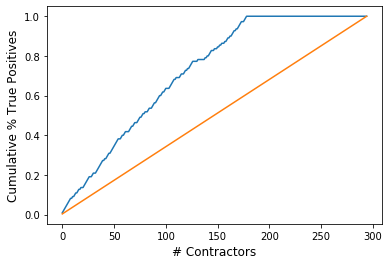

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(df_test_result["%_Cumulative_True_Positive"].values.tolist())
plt.plot(df_test_result["%_Cumulative_Count"].values.tolist())
plt.xlabel('# Contractors',fontsize=12)
plt.ylabel('Cumulative % True Positives',fontsize=12)

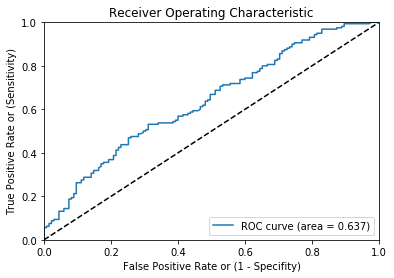

In [21]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


fpr, tpr, thresholds = roc_curve(df_test_result["Actual"].values.tolist(), df_test_result["Predict_Positive_Prob"].values.tolist())
roc_auc = auc(fpr,tpr)


plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")